In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('sisu_trabalhado.csv')

,NU_ANO,NU_EDICAO,CO_IES,NO_IES,SG_IES,DS_ORGANIZACAO_ACADEMICA,DS_CATEGORIA_ADM,NO_CAMPUS,NO_MUNICIPIO_CAMPUS,SG_UF_CAMPUS,...,IGC,MUNIC,COD,POP,UF_y,HIERARQUIA_URBANA,COD_HIERARQUIA_URBANA,GRUPO_HIERARQUIA_URBANA,IA,IA_Q5
0,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE,...,4,RECIFE,2611606,1488920.0,PE,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06
1,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE,...,4,RECIFE,2611606,1488920.0,PE,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06
2,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE,...,4,RECIFE,2611606,1488920.0,PE,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06
3,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE,...,4,RECIFE,2611606,1488920.0,PE,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06
4,2023,1,580,UNIVERSIDADE FEDERAL DE PERNAMBUCO,UFPE,Universidade,Pública Federal,Campus do Agreste Caruaru,Caruaru,PE,...,4,RECIFE,2611606,1488920.0,PE,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,2023,1,367,UNIVERSIDADE ESTADUAL DE MONTES CLAROS,UNIMONTES,Universidade,Pública Estadual,CAMPUS DE MONTES CLAROS,Montes Claros,MG,...,4,MONTES CLAROS,3143302,414240.0,MG,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05
5705,2023,1,367,UNIVERSIDADE ESTADUAL DE MONTES CLAROS,UNIMONTES,Universidade,Pública Estadual,CAMPUS DE MONTES CLAROS,Montes Claros,MG,...,4,MONTES CLAROS,3143302,414240.0,MG,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05
5706,2023,1,367,UNIVERSIDADE ESTADUAL DE MONTES CLAROS,UNIMONTES,Universidade,Pública Estadual,CAMPUS DE MONTES CLAROS,Montes Claros,MG,...,4,MONTES CLAROS,3143302,414240.0,MG,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05
5707,2023,1,367,UNIVERSIDADE ESTADUAL DE MONTES CLAROS,UNIMONTES,Universidade,Pública Estadual,CAMPUS DE MONTES CLAROS,Montes Claros,MG,...,4,MONTES CLAROS,3143302,414240.0,MG,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05


In [187]:
sisu = pd.read_csv('sisu_trabalhado.csv')

In [188]:
sisu.columns

Index(['NU_ANO', 'NU_EDICAO', 'CO_IES', 'NO_IES', 'SG_IES',
       'DS_ORGANIZACAO_ACADEMICA', 'DS_CATEGORIA_ADM', 'NO_CAMPUS',
       'NO_MUNICIPIO_CAMPUS', 'SG_UF_CAMPUS', 'DS_REGIAO_CAMPUS',
       'CO_IES_CURSO', 'NO_CURSO', 'DS_GRAU', 'DS_TURNO',
       'TP_MOD_CONCORRENCIA', 'DS_MOD_CONCORRENCIA', 'NU_PERCENTUAL_BONUS',
       'QT_VAGAS_CONCORRENCIA', 'NU_NOTACORTE', 'QT_INSCRICAO', 'Código IES',
       'Instituição(IES)', 'Município', 'UF_x', 'CI', 'IGC', 'MUNIC', 'COD',
       'POP', 'UF_y', 'HIERARQUIA_URBANA', 'COD_HIERARQUIA_URBANA',
       'GRUPO_HIERARQUIA_URBANA', 'IA', 'IA_Q5'],
      dtype='object')

In [189]:
sisu = sisu[["SG_IES","DS_CATEGORIA_ADM","SG_UF_CAMPUS","DS_REGIAO_CAMPUS","NO_MUNICIPIO_CAMPUS","NO_CURSO",
            "DS_GRAU","DS_TURNO","QT_VAGAS_CONCORRENCIA","QT_INSCRICAO","CI","IGC","POP","HIERARQUIA_URBANA",
            "COD_HIERARQUIA_URBANA","GRUPO_HIERARQUIA_URBANA","IA","IA_Q5","NU_NOTACORTE"]]
sisu.shape

(5709, 19)

In [190]:
sisu

,SG_IES,DS_CATEGORIA_ADM,SG_UF_CAMPUS,DS_REGIAO_CAMPUS,NO_MUNICIPIO_CAMPUS,NO_CURSO,DS_GRAU,DS_TURNO,QT_VAGAS_CONCORRENCIA,QT_INSCRICAO,CI,IGC,POP,HIERARQUIA_URBANA,COD_HIERARQUIA_URBANA,GRUPO_HIERARQUIA_URBANA,IA,IA_Q5,NU_NOTACORTE
0,UFPE,Pública Federal,PE,Nordeste,Caruaru,QUÍMICA,Licenciatura,Noturno,40,28.0,5,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,625.85
1,UFPE,Pública Federal,PE,Nordeste,Caruaru,MEDICINA,Bacharelado,Integral,40,221.0,5,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,854.48
2,UFPE,Pública Federal,PE,Nordeste,Caruaru,PEDAGOGIA,Licenciatura,Noturno,40,150.0,5,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,652.25
3,UFPE,Pública Federal,PE,Nordeste,Caruaru,COMUNICAÇÃO SOCIAL,Bacharelado,Integral,20,37.0,5,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,715.56
4,UFPE,Pública Federal,PE,Nordeste,Caruaru,ENGENHARIA DE PRODUÇÃO,Bacharelado,Integral,40,21.0,5,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,671.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,CIÊNCIAS DA RELIGIÃO,Licenciatura,Noturno,13,48.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,539.70
5705,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,CIÊNCIAS SOCIAIS,Bacharelado,Matutino,13,58.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,611.40
5706,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,ENGENHARIA CIVIL,Bacharelado,Integral,12,101.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,709.75
5707,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,GEOGRAFIA,Bacharelado,Matutino,10,32.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,597.10


In [191]:
sisu.isnull().sum()

SG_IES                     0
DS_CATEGORIA_ADM           0
SG_UF_CAMPUS               0
DS_REGIAO_CAMPUS           0
NO_MUNICIPIO_CAMPUS        0
NO_CURSO                   0
DS_GRAU                    0
DS_TURNO                   0
QT_VAGAS_CONCORRENCIA      0
QT_INSCRICAO               0
CI                         0
IGC                        0
POP                        0
HIERARQUIA_URBANA          0
COD_HIERARQUIA_URBANA      0
GRUPO_HIERARQUIA_URBANA    0
IA                         0
IA_Q5                      0
NU_NOTACORTE               0
dtype: int64

In [192]:
sisu.dtypes

SG_IES                      object
DS_CATEGORIA_ADM            object
SG_UF_CAMPUS                object
DS_REGIAO_CAMPUS            object
NO_MUNICIPIO_CAMPUS         object
NO_CURSO                    object
DS_GRAU                     object
DS_TURNO                    object
QT_VAGAS_CONCORRENCIA        int64
QT_INSCRICAO               float64
CI                          object
IGC                         object
POP                        float64
HIERARQUIA_URBANA           object
COD_HIERARQUIA_URBANA       object
GRUPO_HIERARQUIA_URBANA     object
IA                         float64
IA_Q5                      float64
NU_NOTACORTE               float64
dtype: object

In [193]:
sisu.IGC.value_counts()

4    4014
3     907
5     784
-       4
Name: IGC, dtype: int64

In [194]:
sisu[sisu.IGC=='-']

,SG_IES,DS_CATEGORIA_ADM,SG_UF_CAMPUS,DS_REGIAO_CAMPUS,NO_MUNICIPIO_CAMPUS,NO_CURSO,DS_GRAU,DS_TURNO,QT_VAGAS_CONCORRENCIA,QT_INSCRICAO,CI,IGC,POP,HIERARQUIA_URBANA,COD_HIERARQUIA_URBANA,GRUPO_HIERARQUIA_URBANA,IA,IA_Q5,NU_NOTACORTE
4843,CP II,Pública Federal,RJ,Sudeste,Rio de Janeiro,HISTÓRIA,Licenciatura,Noturno,20,165.0,-,-,6211223.0,Metrópole Nacional - Integrante de Arranjo Pop...,1B - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.147293e+06,1.563113e+06,641.42
4844,CP II,Pública Federal,RJ,Sudeste,Rio de Janeiro,FILOSOFIA,Licenciatura,Noturno,20,149.0,-,-,6211223.0,Metrópole Nacional - Integrante de Arranjo Pop...,1B - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.147293e+06,1.563113e+06,600.42
4845,CP II,Pública Federal,RJ,Sudeste,Rio de Janeiro,GEOGRAFIA,Licenciatura,Noturno,20,123.0,-,-,6211223.0,Metrópole Nacional - Integrante de Arranjo Pop...,1B - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.147293e+06,1.563113e+06,620.37
4846,CP II,Pública Federal,RJ,Sudeste,Rio de Janeiro,CIÊNCIAS SOCIAIS,Licenciatura,Noturno,20,168.0,-,-,6211223.0,Metrópole Nacional - Integrante de Arranjo Pop...,1B - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.147293e+06,1.563113e+06,615.76


In [195]:
ies_igc = sisu[['SG_IES','DS_CATEGORIA_ADM','SG_UF_CAMPUS','IGC']].drop_duplicates()

In [196]:
moda_rj = ies_igc[(ies_igc.DS_CATEGORIA_ADM=='Pública Federal') & (ies_igc.SG_UF_CAMPUS=='RJ')].IGC.mode()[0]
sisu.IGC = sisu.IGC.apply(lambda x: moda_rj if x=='-' else x)

In [197]:
sisu.IGC.value_counts()

4    4018
3     907
5     784
Name: IGC, dtype: int64

In [198]:
sisu.CI.value_counts()

5    2062
4    1924
-    1373
3     318
2      32
Name: CI, dtype: int64

In [199]:
sisu[sisu.CI=='-']

,SG_IES,DS_CATEGORIA_ADM,SG_UF_CAMPUS,DS_REGIAO_CAMPUS,NO_MUNICIPIO_CAMPUS,NO_CURSO,DS_GRAU,DS_TURNO,QT_VAGAS_CONCORRENCIA,QT_INSCRICAO,CI,IGC,POP,HIERARQUIA_URBANA,COD_HIERARQUIA_URBANA,GRUPO_HIERARQUIA_URBANA,IA,IA_Q5,NU_NOTACORTE
151,UPE,Pública Estadual,PE,Nordeste,Nazaré da Mata,GEOGRAFIA,Licenciatura,Noturno,21,176.0,-,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,574.10
152,UPE,Pública Estadual,PE,Nordeste,Nazaré da Mata,HISTÓRIA,Licenciatura,Noturno,21,160.0,-,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,607.34
153,UPE,Pública Estadual,PE,Nordeste,Nazaré da Mata,LETRAS - PORTUGUÊS E INGLÊS,Licenciatura,Noturno,21,137.0,-,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,617.84
154,UPE,Pública Estadual,PE,Nordeste,Nazaré da Mata,PEDAGOGIA,Licenciatura,Noturno,21,309.0,-,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,588.36
155,UPE,Pública Estadual,PE,Nordeste,Nazaré da Mata,CIÊNCIAS BIOLÓGICAS,Licenciatura,Vespertino,15,137.0,-,4,1488920.0,Metrópole - Integrante de Arranjo Populacional,1C - Integrante de Arranjo Populacional,1 - Metrópole - Integrante de Arranjo Populaci...,3.002146e+06,2.294139e+06,579.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,CIÊNCIAS DA RELIGIÃO,Licenciatura,Noturno,13,48.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,539.70
5705,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,CIÊNCIAS SOCIAIS,Bacharelado,Matutino,13,58.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,611.40
5706,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,ENGENHARIA CIVIL,Bacharelado,Integral,12,101.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,709.75
5707,UNIMONTES,Pública Estadual,MG,Sudeste,Montes Claros,GEOGRAFIA,Bacharelado,Matutino,10,32.0,-,4,414240.0,Capital Regional B,2B,2 - Capital Regional,6.666364e+05,9.313880e+05,597.10


In [200]:
sisu.DS_CATEGORIA_ADM.value_counts()

Pública Federal      4468
Pública Estadual     1240
Pública Municipal       1
Name: DS_CATEGORIA_ADM, dtype: int64

In [201]:
sisu[sisu.CI=='-'].DS_CATEGORIA_ADM.value_counts()

Pública Estadual     1240
Pública Federal       132
Pública Municipal       1
Name: DS_CATEGORIA_ADM, dtype: int64

In [202]:
ies_ci = sisu[sisu.CI!='-'][['SG_IES','SG_UF_CAMPUS','CI']].drop_duplicates()

In [203]:
# Criar a tabela com a moda da coluna 'CI' agrupada pela UF
modas_CI = ies_ci.groupby('SG_UF_CAMPUS')['CI'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

# Renomear a coluna 'CI' para 'MODA_CI'
modas_CI.rename(columns={'CI': 'MODA_CI'}, inplace=True)

# Fazer o join com o DataFrame sisu
sisu = sisu.merge(modas_CI, on='SG_UF_CAMPUS', how='left')

# Substituir valores '-' em 'CI' pela moda
sisu['CI'] = sisu.apply(lambda row: row['MODA_CI'] if row['CI'] == '-' else row['CI'], axis=1)

# Remover a coluna 'MODA_CI' se não for mais necessária
sisu.drop(columns=['MODA_CI'], inplace=True)

In [204]:
sisu.CI.value_counts()

4    3162
5    2142
3     373
2      32
Name: CI, dtype: int64

In [205]:
sisu.GRUPO_HIERARQUIA_URBANA.value_counts()

1 - Metrópole - Integrante de Arranjo Populacional              2291
2 - Capital Regional - Integrante de Arranjo Populacional       1726
2 - Capital Regional                                             870
3 - Centro Sub-Regional                                          372
3 - Centro Sub-Regional - Integrante de Arranjo Populacional     314
1 - Metrópole                                                    115
5 - Centro Local - Integrante de Arranjo Populacional             20
5 - Centro Local                                                   1
Name: GRUPO_HIERARQUIA_URBANA, dtype: int64

In [206]:
sisu.GRUPO_HIERARQUIA_URBANA = sisu.GRUPO_HIERARQUIA_URBANA.apply(lambda x: str(x)[0])
sisu.GRUPO_HIERARQUIA_URBANA.value_counts()

2    2596
1    2406
3     686
5      21
Name: GRUPO_HIERARQUIA_URBANA, dtype: int64

In [207]:
sisu.to_csv("sisu_trabalhado1.csv", index=False)

# Tabelas e Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [218]:
data = sisu.copy()

In [219]:
# Definir cores suaves
cor_histograma = '#34515e'  # Azul escuro suave
cor_boxplot = '#ffc04d'  # Amarelado mais escuro

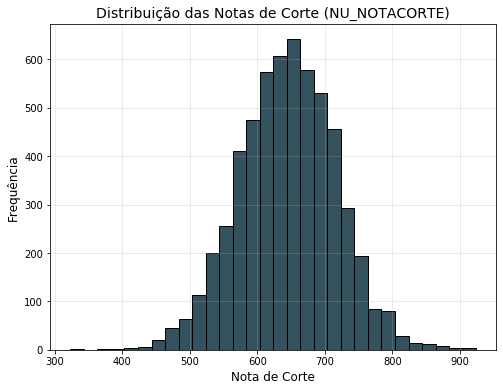

,count,mean,std,min,25%,50%,75%,max,mediana
NU_NOTACORTE,5709.0,644.579136,71.431199,323.18,596.15,645.7,693.86,923.9,645.7


In [220]:
# Gerar o histograma para a distribuição das notas de corte (NU_NOTACORTE)
plt.figure(figsize=(8, 6))
plt.hist(data['NU_NOTACORTE'], bins=30, color=cor_histograma, edgecolor='black')
plt.title('Distribuição das Notas de Corte (NU_NOTACORTE)', fontsize=14)
plt.xlabel('Nota de Corte', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Gerar tabela resumo com média, mediana, desvio padrão, valor mínimo e máximo das notas de corte
nota_corte_resumo = data['NU_NOTACORTE'].describe().to_frame().T
nota_corte_resumo['mediana'] = data['NU_NOTACORTE'].median()
nota_corte_resumo

C:\Users\Mateus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 720x432 with 0 Axes>

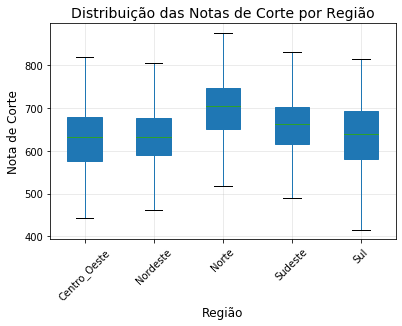

,DS_REGIAO_CAMPUS,NU_NOTACORTE
0,Centro_Oeste,627.173381
1,Nordeste,636.096243
2,Norte,696.941009
3,Sudeste,658.260916
4,Sul,634.135610


In [221]:
# Gerar o boxplot para as notas de corte por região (DS_REGIAO_CAMPUS)
plt.figure(figsize=(10, 6))
data.boxplot(column='NU_NOTACORTE', by='DS_REGIAO_CAMPUS', grid=False, showfliers=False, 
             patch_artist=True, boxprops=dict(facecolor=cor_boxplot))
plt.title('Distribuição das Notas de Corte por Região', fontsize=14)
plt.suptitle('')  # Remover o título adicional gerado pelo boxplot
plt.xlabel('Região', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Gerar a tabela com a média das notas de corte por região
media_notas_regiao = data.groupby('DS_REGIAO_CAMPUS')['NU_NOTACORTE'].mean().reset_index()
media_notas_regiao

C:\Users\Mateus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 864x576 with 0 Axes>

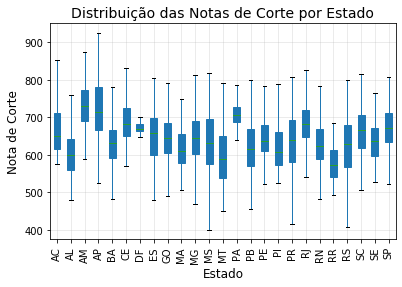

,SG_UF_CAMPUS,NU_NOTACORTE
2,AM,732.024696
13,PA,710.511951
3,AP,710.481429
5,CE,690.100090
18,RJ,680.290023
6,DF,676.450833
24,SP,670.168173
0,AC,662.382051
22,SC,657.553066
7,ES,651.527583


In [222]:
# Gerar o boxplot para as notas de corte por estado (SG_UF_CAMPUS)
plt.figure(figsize=(12, 8))
data.boxplot(column='NU_NOTACORTE', by='SG_UF_CAMPUS', grid=False, showfliers=False, patch_artist=True, 
             boxprops=dict(facecolor=cor_boxplot))
plt.title('Distribuição das Notas de Corte por Estado', fontsize=14)
plt.suptitle('')  # Remover o título adicional gerado pelo boxplot
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.show()

# Gerar a tabela com a média das notas de corte por estado
media_notas_estado = data.groupby('SG_UF_CAMPUS')['NU_NOTACORTE'].mean().reset_index()
media_notas_estado.sort_values('NU_NOTACORTE', ascending=False)

C:\Users\Mateus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 576x432 with 0 Axes>

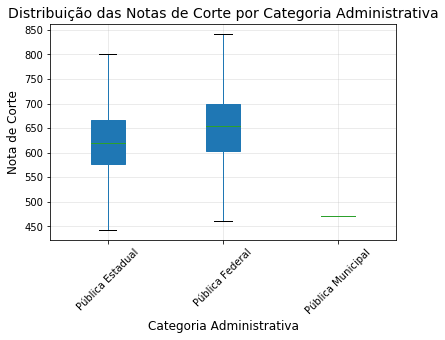

,DS_CATEGORIA_ADM,NU_NOTACORTE
0,Pública Estadual,622.707839
1,Pública Federal,650.688109
2,Pública Municipal,470.100000


In [223]:
# Gerar o boxplot para as notas de corte por categoria administrativa (DS_CATEGORIA_ADM)
plt.figure(figsize=(8, 6))
data.boxplot(column='NU_NOTACORTE', by='DS_CATEGORIA_ADM', grid=False, showfliers=False, patch_artist=True, 
             boxprops=dict(facecolor=cor_boxplot))
plt.title('Distribuição das Notas de Corte por Categoria Administrativa', fontsize=14)
plt.suptitle('')  # Remover o título adicional gerado pelo boxplot
plt.xlabel('Categoria Administrativa', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Gerar a tabela com a média das notas de corte por categoria administrativa
media_notas_categoria = data.groupby('DS_CATEGORIA_ADM')['NU_NOTACORTE'].mean().reset_index()
media_notas_categoria

C:\Users\Mateus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 576x432 with 0 Axes>

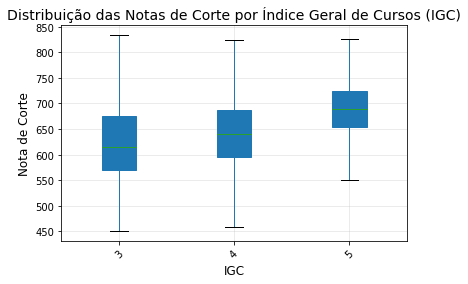

,IGC,NU_NOTACORTE
0,3,623.900110
1,4,641.088945
2,5,686.389681


In [244]:
# Gerar o boxplot para as notas de corte por categoria administrativa (DS_CATEGORIA_ADM)
plt.figure(figsize=(8, 6))
data.boxplot(column='NU_NOTACORTE', by='IGC', grid=False, showfliers=False, patch_artist=True, 
             boxprops=dict(facecolor=cor_boxplot))
plt.title('Distribuição das Notas de Corte por Índice Geral de Cursos (IGC)', fontsize=14)
plt.suptitle('')  # Remover o título adicional gerado pelo boxplot
plt.xlabel('IGC', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Gerar a tabela com a média das notas de corte por categoria administrativa
media_notas_categoria = data.groupby('IGC')['NU_NOTACORTE'].mean().reset_index()
media_notas_categoria

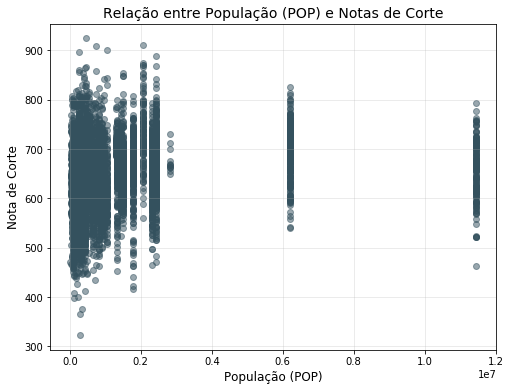

,POP,NU_NOTACORTE
POP,1.000000,0.155786
NU_NOTACORTE,0.155786,1.000000


In [225]:
# Gerar o gráfico de dispersão (scatter plot) para a relação entre POP e NU_NOTACORTE
plt.figure(figsize=(8, 6))
plt.scatter(data['POP'], data['NU_NOTACORTE'], alpha=0.5, color=cor_histograma)
plt.title('Relação entre População (POP) e Notas de Corte', fontsize=14)
plt.xlabel('População (POP)', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Calcular a correlação entre POP e NU_NOTACORTE
correlacao_pop_nota = data[['POP', 'NU_NOTACORTE']].corr()
correlacao_pop_nota

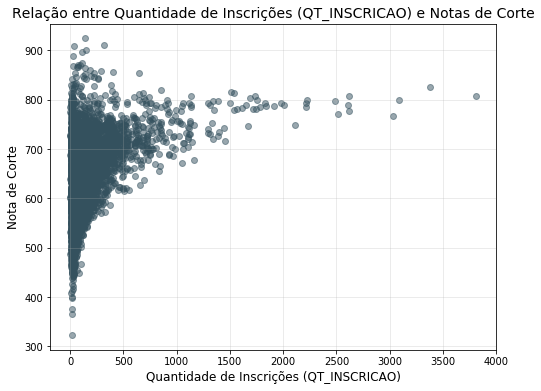

,QT_INSCRICAO,NU_NOTACORTE
QT_INSCRICAO,1.000000,0.397343
NU_NOTACORTE,0.397343,1.000000


In [226]:
# Gerar o gráfico de dispersão (scatter plot) para a relação entre QT_INSCRICAO e NU_NOTACORTE
plt.figure(figsize=(8, 6))
plt.scatter(data['QT_INSCRICAO'], data['NU_NOTACORTE'], alpha=0.5, color=cor_histograma)
plt.title('Relação entre Quantidade de Inscrições (QT_INSCRICAO) e Notas de Corte', fontsize=14)
plt.xlabel('Quantidade de Inscrições (QT_INSCRICAO)', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Calcular a correlação entre QT_INSCRICAO e NU_NOTACORTE
correlacao_inscricao_nota = data[['QT_INSCRICAO', 'NU_NOTACORTE']].corr()
correlacao_inscricao_nota

C:\Users\Mateus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 864x576 with 0 Axes>

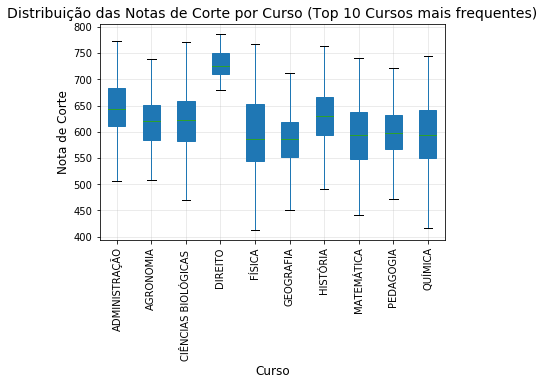

,NO_CURSO,NU_NOTACORTE
0,ENGENHARIA DE MECATRÔNICA,831.720000
1,MEDICINA,810.790247
2,ENGENHARIA DE COMPUTAÇÃO E INFORMAÇÃO,809.210000
3,ENGENHARIA AEROESPACIAL,782.860000
4,ENGENHARIA ELETRÔNICA E DE COMPUTAÇÃO,781.210000
5,INTELIGÊNCIA ARTIFICIAL,778.810000
6,ENGENHARIA NUCLEAR,770.460000
7,ENGENHARIA AERONÁUTICA,770.455000
8,CINEMA,764.450000
9,ENGENHARIA DA COMPUTAÇÃO,763.624444


In [245]:
# Gerar o boxplot para as notas de corte por curso (NO_CURSO)
cursos_mais_frequentes = data['NO_CURSO'].value_counts().nlargest(10).index  # Selecionar os 10 cursos mais frequentes
data_filtrada = data[data['NO_CURSO'].isin(cursos_mais_frequentes)]  # Filtrar os 10 cursos mais frequentes

plt.figure(figsize=(12, 8))
data_filtrada.boxplot(column='NU_NOTACORTE', by='NO_CURSO', grid=False, showfliers=False, patch_artist=True, 
                      boxprops=dict(facecolor=cor_boxplot))
plt.title('Distribuição das Notas de Corte por Curso (Top 10 Cursos mais frequentes)', fontsize=14)
plt.suptitle('')  # Remover o título adicional gerado pelo boxplot
plt.xlabel('Curso', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.show()

# Gerar tabela resumo com as 10 maiores média das notas de corte para os cursos
media_notas_curso = data.groupby('NO_CURSO')['NU_NOTACORTE'].mean().nlargest(10).reset_index()
media_notas_curso

C:\Users\Mateus\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 720x432 with 0 Axes>

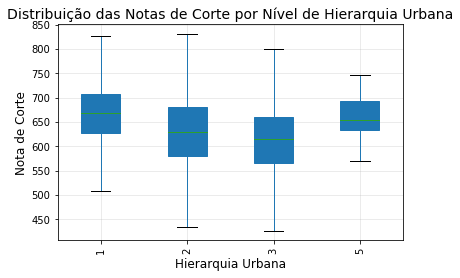

,GRUPO_HIERARQUIA_URBANA,NU_NOTACORTE
0,1,666.818130
1,2,632.403082
2,3,612.557070
3,5,647.872381


In [228]:
# Gerar o boxplot para as notas de corte por nível de hierarquia urbana
plt.figure(figsize=(10, 6))
data.boxplot(column='NU_NOTACORTE', by='GRUPO_HIERARQUIA_URBANA', grid=False, showfliers=False, patch_artist=True, 
             boxprops=dict(facecolor=cor_boxplot))
plt.title('Distribuição das Notas de Corte por Nível de Hierarquia Urbana', fontsize=14)
plt.suptitle('')  # Remover o título adicional gerado pelo boxplot
plt.xlabel('Hierarquia Urbana', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.show()

# Gerar a tabela com a média das notas de corte por grupo de hierarquia urbana
media_notas_hierarquia = data.groupby('GRUPO_HIERARQUIA_URBANA')['NU_NOTACORTE'].mean().reset_index()
media_notas_hierarquia

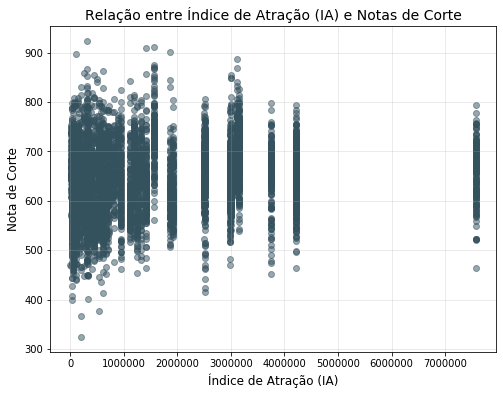

,IA,NU_NOTACORTE
IA,1.000000,0.155273
NU_NOTACORTE,0.155273,1.000000


In [229]:
# Gerar o gráfico de dispersão (scatter plot) para a relação entre IA (Índice de Atração) e NU_NOTACORTE
plt.figure(figsize=(8, 6))
plt.scatter(data['IA'], data['NU_NOTACORTE'], alpha=0.5, color=cor_histograma)
plt.title('Relação entre Índice de Atração (IA) e Notas de Corte', fontsize=14)
plt.xlabel('Índice de Atração (IA)', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Calcular a correlação entre IA e NU_NOTACORTE
correlacao_ia_nota = data[['IA', 'NU_NOTACORTE']].corr()
correlacao_ia_nota

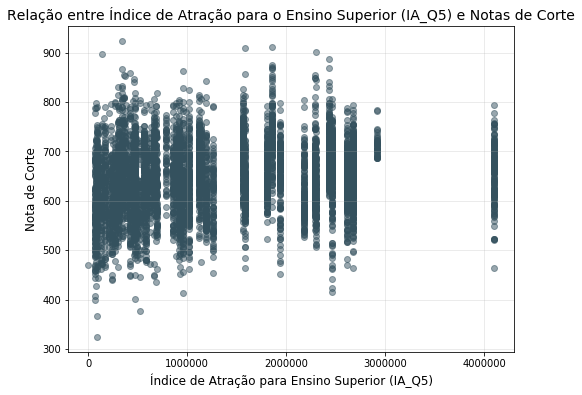

,IA_Q5,NU_NOTACORTE
IA_Q5,1.000000,0.157931
NU_NOTACORTE,0.157931,1.000000


In [230]:
# Gerar o gráfico de dispersão (scatter plot) para a relação entre IA_Q5 (Índice de Atração para Ensino Superior) e NU_NOTACORTE
plt.figure(figsize=(8, 6))
plt.scatter(data['IA_Q5'], data['NU_NOTACORTE'], alpha=0.5, color=cor_histograma)
plt.title('Relação entre Índice de Atração para o Ensino Superior (IA_Q5) e Notas de Corte', fontsize=14)
plt.xlabel('Índice de Atração para Ensino Superior (IA_Q5)', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Calcular a correlação entre IA_Q5 e NU_NOTACORTE
correlacao_iaq5_nota = data[['IA_Q5', 'NU_NOTACORTE']].corr()
correlacao_iaq5_nota

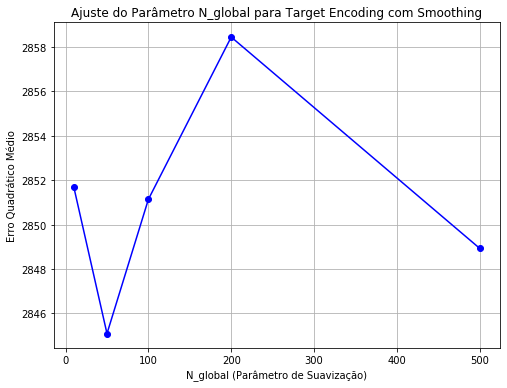

,N_global,Erro Quadrático Médio
0,10,2851.679772
1,50,2845.088372
2,100,2851.140402
3,200,2858.452682
4,500,2848.929567


In [234]:
# Função para aplicar target encoding com smoothing e calcular o desempenho do modelo
def calcular_desempenho(N_global):
    # Calcular a média global das notas de corte
    media_global = data['NU_NOTACORTE'].mean()
    
    # Calcular a média de notas de corte por curso e o número de observações de cada curso
    curso_stats = data.groupby('NO_CURSO')['NU_NOTACORTE'].agg(['mean', 'count']).reset_index()
    curso_stats.columns = ['NO_CURSO', 'media_curso', 'contagem_curso']
    
    # Aplicar o smoothing
    curso_stats['curso_smoothed'] = (curso_stats['contagem_curso'] * curso_stats['media_curso'] + 
                                     N_global * media_global) / (curso_stats['contagem_curso'] + N_global)
    
    # Mapear os valores suavizados de volta para a base de dados original
    data_smooth = data.merge(curso_stats[['NO_CURSO', 'curso_smoothed']], on='NO_CURSO', how='left')
    
    # Separar as features e o target
    X = data_smooth[['curso_smoothed']]  # Neste exemplo, estamos usando apenas o encoding dos cursos como feature
    y = data_smooth['NU_NOTACORTE']
    
    # Treinar um modelo simples (Random Forest) para avaliar o desempenho com diferentes valores de N_global
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Avaliar o desempenho usando validação cruzada (com 5 folds)
    scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()  # Retornar o erro quadrático médio (negativo revertido para positivo)


# Definir uma lista de valores de N_global para testar
valores_N_global = [10, 50, 100, 200, 500]

# Testar cada valor de N_global e armazenar os resultados
resultados = []
for N in valores_N_global:
    desempenho = calcular_desempenho(N)
    resultados.append((N, desempenho))

# Converter resultados para um DataFrame para facilitar a visualização
resultados_df = pd.DataFrame(resultados, columns=['N_global', 'Erro Quadrático Médio'])

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.plot(resultados_df['N_global'], resultados_df['Erro Quadrático Médio'], marker='o', color='b')
plt.title('Ajuste do Parâmetro N_global para Target Encoding com Smoothing')
plt.xlabel('N_global (Parâmetro de Suavização)')
plt.ylabel('Erro Quadrático Médio')
plt.grid(True)
plt.show()

# Mostrar os resultados para avaliação
resultados_df

In [236]:
N_global = 50

# Calcular a média global das notas de corte
media_global = data['NU_NOTACORTE'].mean()

# Calcular a média de notas de corte por curso e o número de observações de cada curso
curso_stats = data.groupby('NO_CURSO')['NU_NOTACORTE'].agg(['mean', 'count']).reset_index()
curso_stats.columns = ['NO_CURSO', 'media_curso', 'contagem_curso']

# Aplicar o smoothing
curso_stats['curso_smoothed'] = (curso_stats['contagem_curso'] * curso_stats['media_curso'] + 
                                 N_global * media_global) / (curso_stats['contagem_curso'] + N_global)

# Mapear os valores suavizados de volta para a base de dados original
data = data.merge(curso_stats[['NO_CURSO', 'curso_smoothed']], on='NO_CURSO', how='left')

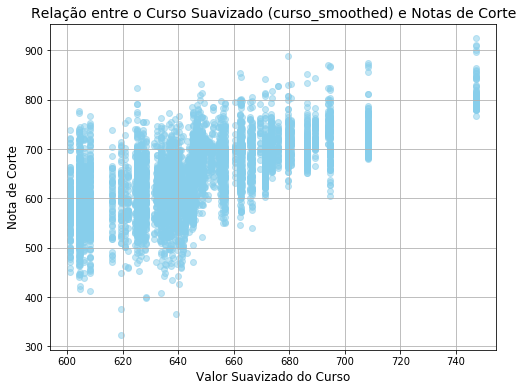

,curso_smoothed,NU_NOTACORTE
curso_smoothed,1.000000,0.630677
NU_NOTACORTE,0.630677,1.000000


In [246]:
# Gerar o scatter plot para mostrar a relação entre o curso suavizado e a nota de corte
plt.figure(figsize=(8, 6))
plt.scatter(data['curso_smoothed'], data['NU_NOTACORTE'], alpha=0.5, color='skyblue')
plt.title('Relação entre o Curso Suavizado (curso_smoothed) e Notas de Corte', fontsize=14)
plt.xlabel('Valor Suavizado do Curso', fontsize=12)
plt.ylabel('Nota de Corte', fontsize=12)
plt.grid(True)
plt.show()

# Calcular a correlação entre IA_Q5 e NU_NOTACORTE
correlacao_curso_smooth_nota = data[['curso_smoothed', 'NU_NOTACORTE']].corr()
correlacao_curso_smooth_nota

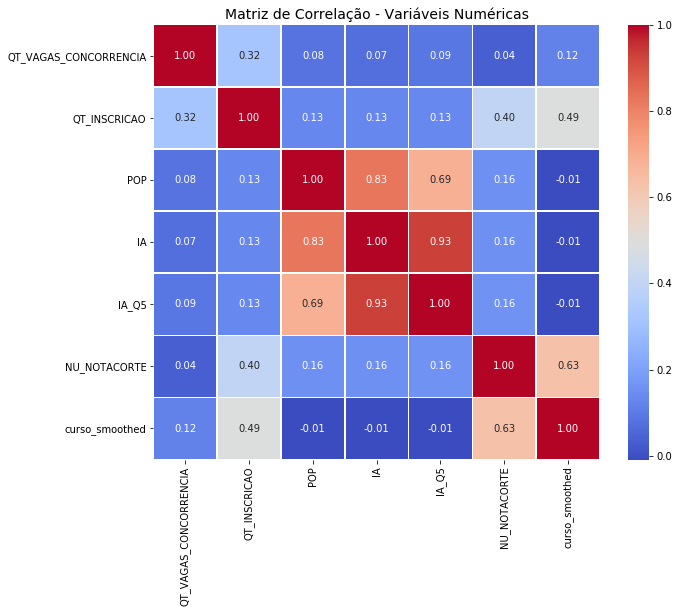

In [248]:
# Calcular a matriz de correlação
matriz_correlacao = data.corr()

# Gerar um heatmap para visualizar a nova correlação entre as variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14)
plt.show()

In [250]:
data.to_csv("sisu_trabalhado2.csv", index=False)